In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [3]:
(x_train,_),(x_test,_)=mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0
x_train=x_train.reshape((x_train.shape[0],28,28,1))
x_test=x_test.reshape((x_test.shape[0],28,28,1))

In [4]:
input_img=layers.Input(shape=(28,28,1))

In [10]:
x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(input_img)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(16,(3,3),activation='relu',padding='same')(x)
encoded=layers.MaxPooling2D((2,2),padding='same')(x)


In [11]:
x=layers.Conv2D(16,(3,3),activation='relu',padding='same')(encoded)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)
decoded=layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

In [12]:
autoencoder=models.Model(input_img,decoded)

In [17]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',)

In [18]:
autoencoder.fit(x_train,x_train,epochs=10,batch_size=128,shuffle=True,validation_data=(x_test,x_test))       

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.1316 - val_loss: 0.0807
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0782 - val_loss: 0.0752
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0748 - val_loss: 0.0730
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0729 - val_loss: 0.0717
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0717 - val_loss: 0.0706
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0709 - val_loss: 0.0704
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0703 - val_loss: 0.0693
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0697 - val_loss: 0.0688
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0692 - val_loss: 0.0685
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0688 - val_loss: 0.0681


In [26]:
encoded_imgs=autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 


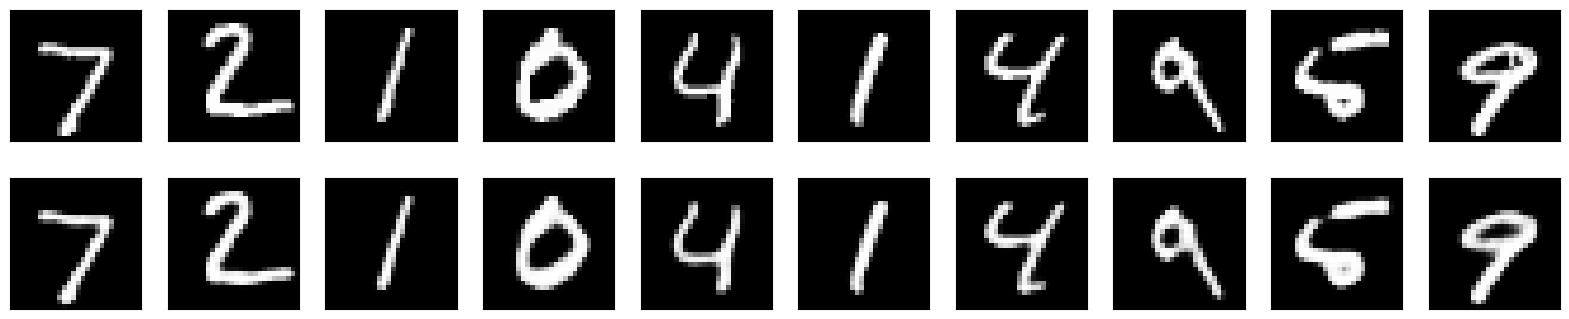

In [28]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28),cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(encoded_imgs[i].reshape(28,28),cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)